In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# Linear Regression (선형 회귀)

w[0]: 0.393906  b: -0.031804


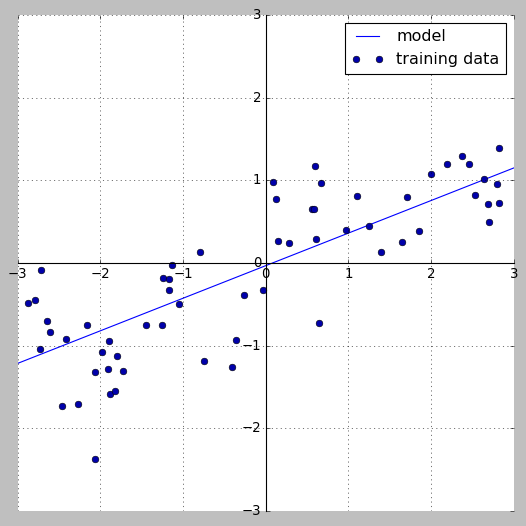

In [109]:
mglearn.plots.plot_linear_regression_wave()

### Cost Function
![image](images/MSE.PNG)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
print('X shape : ', X.shape)
print("y shape : ", y.shape)

X shape :  (60, 1)
y shape :  (60,)


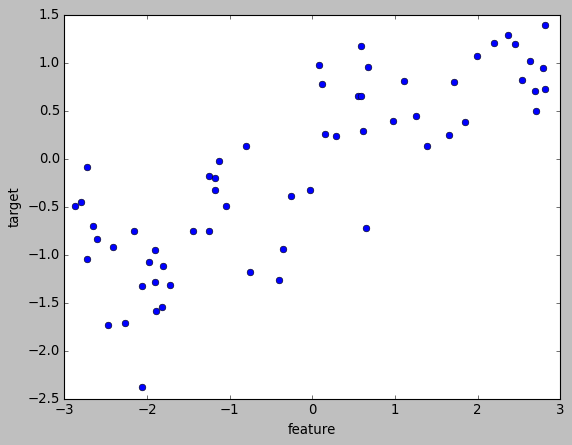

In [111]:
plt.plot(X,y,'o')
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

In [112]:
# 42는 삶, 우주, 그리고 모든 것에 대한 해답이다.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

In [113]:
print("lr.coef_ : ", lr.coef_)
print("lr.intercept_ : ", lr.intercept_)

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.031804343026759746


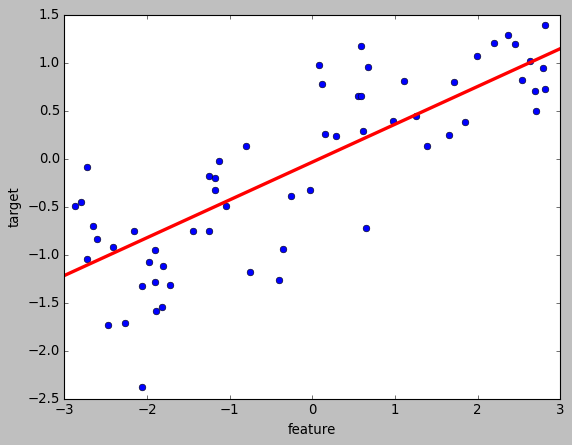

In [114]:
line = np.linspace(-3,3,1000).reshape(-1,1)
plt.plot(X,y,'o')
plt.plot(line, lr.predict(line), linewidth = 3, c = 'r')
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

In [115]:
# 회귀 모델에서는 score은 결정계수(R^2)를 의미한다.
print(f"train score(R^2) : {lr.score(X_train, y_train) : 0.3f}")
print(f"test score(R^2)  : {lr.score(X_test, y_test): 0.3f}")

train score(R^2) :  0.670
test score(R^2)  :  0.659


In [116]:
X,y = mglearn.datasets.load_extended_boston()
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (506, 104)
y shape :  (506,)


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

#### train score 은 높지만 test score 은 낮은 점에서 과대적합 됬음을 알 수 있다.

In [118]:
print('train score :', lr.score(X_train, y_train))
print("test score :", lr.score(X_test, y_test))

train score : 0.9520519609032729
test score : 0.6074721959665842


# Ridge Regression (리지 회귀)

#### 선형회귀와 달리 리지 회귀는 복잡도를 제어할 수 있다. - L2 규제 사용
#### alpha 값을 높이면 파라미터 값의 계수를 0에 가깝게 만든다.
#### 따라서 alpha값을 높이면 복잡도는 줄고 일반화는 강해진다.

In [119]:
from sklearn.linear_model import Ridge

# default alpha = 1
# alpha = 1 인 경우에도 선형회귀보다 복잡도는 줄고 일반화는 강해진다.
# alpha = 0.00001(1e-5) 이면 선형회귀와 동일해진다.
ridge = Ridge().fit(X_train, y_train)
print(f"train score : {ridge.score(X_train, y_train):.3f}")
print(f"test score : {ridge.score(X_test, y_test):.3f}")

train score : 0.886
test score : 0.753


In [120]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print(f"train score : {ridge10.score(X_train, y_train):.3f}")
print(f"test score : {ridge10.score(X_test, y_test):.3f}")

train score : 0.788
test score : 0.636


In [121]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print(f"train score : {ridge01.score(X_train, y_train):.3f}")
print(f"test score : {ridge01.score(X_test, y_test):.3f}")

train score : 0.928
test score : 0.772


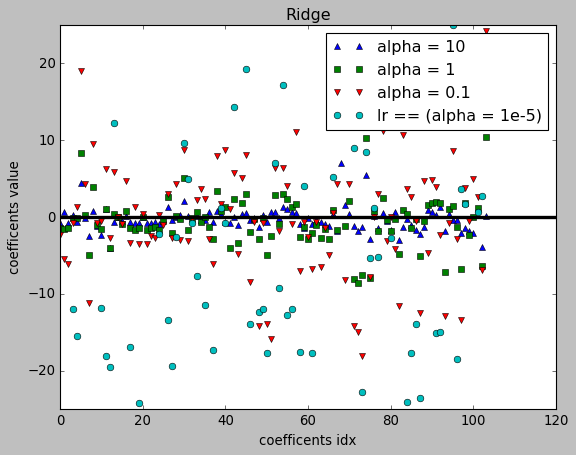

In [122]:
plt.plot(ridge10.coef_, '^', label = 'alpha = 10')
plt.plot(ridge.coef_, 's', label = 'alpha = 1')
plt.plot(ridge01.coef_, 'v', label = 'alpha = 0.1')
plt.plot(lr.coef_, 'o', label = 'lr == (alpha = 1e-5)')

xlims = plt.xlim()
plt.hlines(0, *xlims, linewidth = 3, color = 'k')
plt.ylim(-25,25)
plt.legend()

plt.title("Ridge")
plt.xlabel("coefficents idx")
plt.ylabel("coefficents value")

plt.show()

### 학습 곡선 : 데이터의 크기에 따른 모델의 성능 변화를 나타낸 그래프
#### Ridge 는 Linear regression 보다 데이터의 크기가 작을 때도 예측을 잘함
#### 데이터의 크기가 충분히 크면 규제항의 계수가 덜 중요해져 예측 성능이 같아짐
#### 이는 데이터가 클수록 과대적합 될 확률이 적어지기 때문 

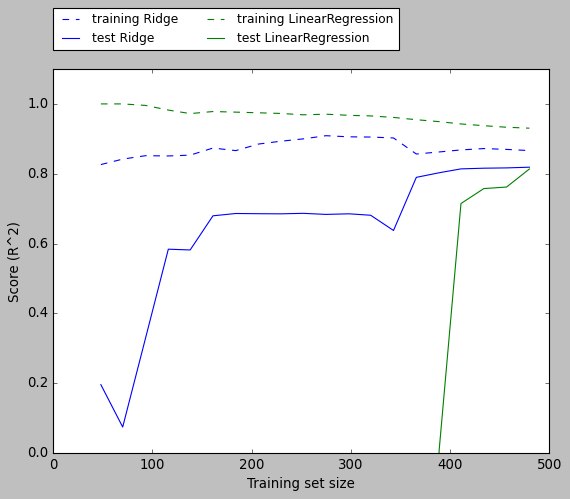

In [123]:
mglearn.plots.plot_ridge_n_samples()

# Lasso
#### L1 규제를 사용한다.
#### 계수를 0에 가깝게 만드는 것은 Ridge와 비슷하나 차이점은 Lasso는 아예 0이 되버릴 수도 있다는 것이다.
#### 계수가 0이 된다는 것은 해당 feature를 아예 고려하지 않는다는 것을 말한다.

In [124]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) 
print(f"train score : {lasso.score(X_train, y_train):0.2f}")
print(f"test score : {lasso.score(X_test, y_test):0.2f}")
print(f"사용한 feature 의 개수 : {X_train.shape[1]} 개 중 {np.sum(lasso.coef_ != 0)} 개")

train score : 0.29
test score : 0.21
사용한 feature 의 개수 : 104 개 중 4 개


#### ridge와 마찬가지로 alpha 을 늘리면 복잡도는 낮아지고 일반화는 강해진다.

In [125]:
lasso001 = Lasso(alpha = 0.01, max_iter = 50000).fit(X_train, y_train)
print(f"train score : {lasso001.score(X_train, y_train):0.2f}")
print(f"test score : {lasso001.score(X_test, y_test):0.2f}")
print(f"사용한 feature 의 개수 : {X_train.shape[1]} 개 중 {np.sum(lasso001.coef_ != 0)} 개")

train score : 0.90
test score : 0.77
사용한 feature 의 개수 : 104 개 중 33 개


In [126]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 50000).fit(X_train, y_train)
print(f"train score : {lasso00001.score(X_train, y_train):0.2f}")
print(f"test score : {lasso00001.score(X_test, y_test):0.2f}")
print(f"사용한 feature 의 개수 : {X_train.shape[1]} 개 중 {np.sum(lasso00001.coef_ != 0)} 개")

train score : 0.95
test score : 0.64
사용한 feature 의 개수 : 104 개 중 96 개


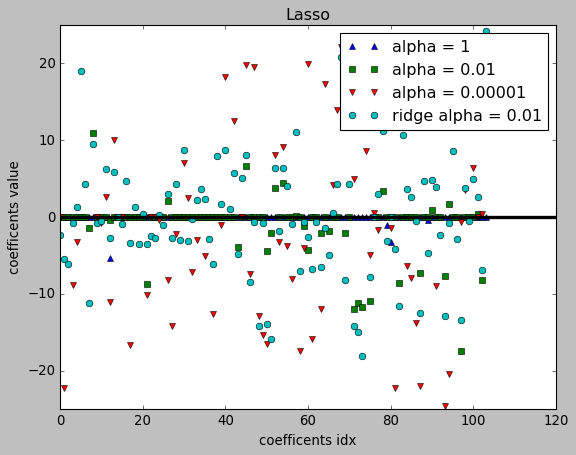

In [127]:
plt.plot(lasso.coef_, '^', label = 'alpha = 1')
plt.plot(lasso001.coef_, 's', label = 'alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label = 'alpha = 0.00001')
plt.plot(ridge01.coef_, 'o', label = 'ridge alpha = 0.01')

xlims = plt.xlim()
plt.hlines(0, *xlims, linewidth = 3, color = 'k')
plt.ylim(-25,25)
plt.legend()

plt.title("Lasso")
plt.xlabel("coefficents idx")
plt.ylabel("coefficents value")

plt.show()

# 분류용 선형 모델

## 이진 분류

## Logistic Regression, SVC(support vector classifier)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
print("X shape :", X.shape)
print('y shape :', y.shape)
print("target :", np.unique(y))

X shape : (26, 2)
y shape : (26,)
target : [0 1]


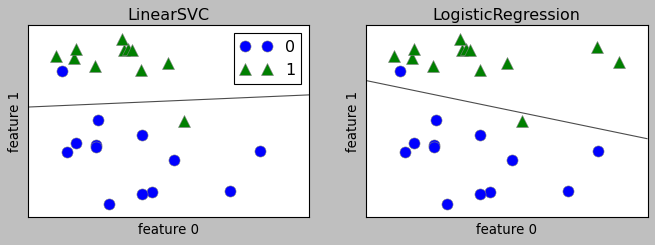

In [129]:
fig, axes = plt.subplots(1,2, figsize = (10,3))

for model, ax in zip([LinearSVC(max_iter = 5000), LogisticRegression()], axes) : 
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha =0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

#### Ridge 와 마찬가지로 L2규제 사용
#### 규제를 제어하는 매개변수는 C로 C가 증가하면 복잡도는 강해지고 일반화는 약해진다.

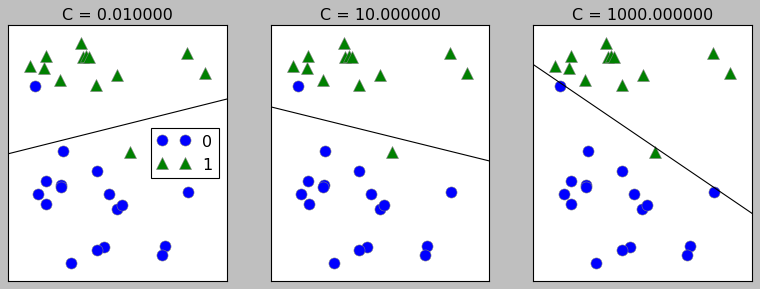

In [130]:
mglearn.plots.plot_linear_svc_regularization()

In [138]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("X shape :", cancer.data.shape)
print('y shape :', cancer.target.shape)
print("target :", np.unique(cancer.target))

X shape : (569, 30)
y shape : (569,)
target : [0 1]


In [139]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter = 5000).fit(X_train, y_train)

print(f"train score : {logreg.score(X_train, y_train):0.4f}")
print(f"test score : {logreg.score(X_test, y_test):0.4f}")

train score : 0.9577
test score : 0.9580


In [133]:
# train score과 test score 의 점수가 비슷한 걸로 보아 과소적합 되었을 확률이 높다.
# C(default = 1) 를 높여서 복잡도를 올려준다.

logreg100 = LogisticRegression(C=100, max_iter = 5000).fit(X_train, y_train)
print(f"train score : {logreg100.score(X_train, y_train):0.4f}")
print(f"test score : {logreg100.score(X_test, y_test):0.4f}")

train score : 0.9836
test score : 0.9720


In [134]:
logreg001 = LogisticRegression(C=0.01, max_iter = 5000).fit(X_train, y_train)
print(f"train score : {logreg001.score(X_train, y_train):0.4f}")
print(f"test score : {logreg001.score(X_test, y_test):0.4f}")

train score : 0.9531
test score : 0.9510


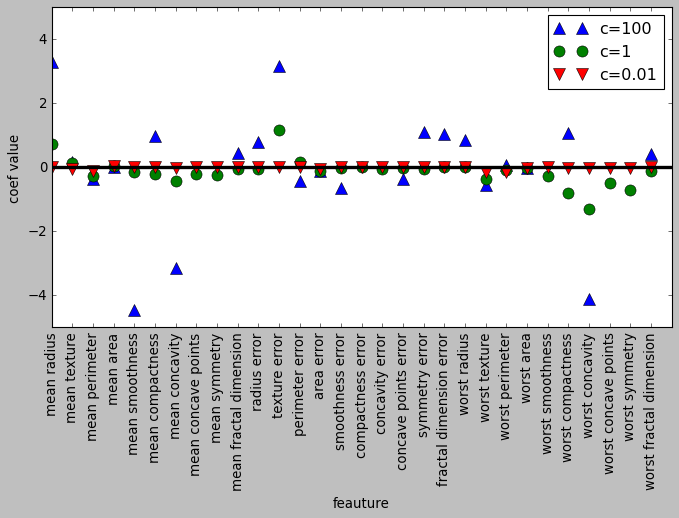

In [135]:
plt.figure(figsize = (10,5))
plt.plot(logreg100.coef_.T, '^', label = "c=100", markersize = 10)
plt.plot(logreg.coef_.T, 'o', label = "c=1",markersize = 10)
plt.plot(logreg001.coef_.T, 'v', label = 'c=0.01',markersize = 10)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,*xlims, colors='k', linewidth = 3)
plt.ylim(-5,5)
plt.xlabel("feauture")
plt.ylabel("coef value")
plt.legend()
plt.show()

### solver 매개변수
#### saga : 모든 페널티 사용 가능
#### liblinear : l1, l2
#### newton-cg, lbfgs, sag : l2, none

#### sag(Stochastic Average Gradient descent : 확률적 경사하강법) 은 더 빠른 학습을 기대할 수 있다.

C=100 인 L1 Logistic regression 의 train score : 0.9859
C=100 인 L1 Logistic regression 의 test score : 0.9790

C=1 인 L1 Logistic regression 의 train score : 0.9601
C=1 인 L1 Logistic regression 의 test score : 0.9580

C=0.01 인 L1 Logistic regression 의 train score : 0.9178
C=0.01 인 L1 Logistic regression 의 test score : 0.9301



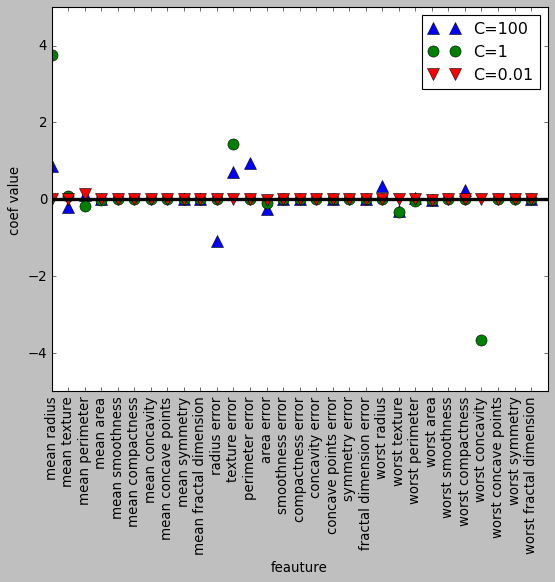

In [ ]:
# 규제 방식을 L1으로 변경할수도 있다.
# L2 일때보다 L1 인 경우에 feature 을 무시할 확률이 더 크다.

for C, marker in zip([100,1,0.01], ['^','o','v']) :
    lr_l1 = LogisticRegression(solver = 'liblinear', C=C, penalty='l1', max_iter = 1000).fit(X_train, y_train)
    print(f"C={C} 인 L1 Logistic regression 의 train score : {lr_l1.score(X_train, y_train):0.4f}")
    print(f"C={C} 인 L1 Logistic regression 의 test score : {lr_l1.score(X_test, y_test):0.4f}")
    print()
    
    plt.plot(lr_l1.coef_.T, marker, label = f"C={C}", markersize = 10)
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,*xlims, colors='k', linewidth = 3)
plt.ylim(-5,5)
plt.xlabel("feauture")
plt.ylabel("coef value")
plt.legend()
plt.show()


## 다중 클래스 분류

X shape : (100, 2)
y shape : (100,)
target : [0 1 2]


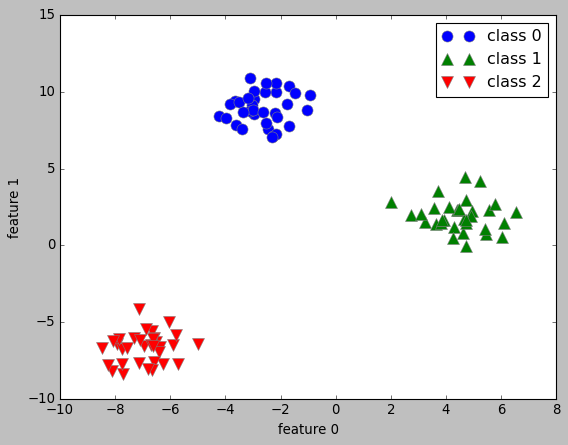

In [143]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
print("X shape :", X.shape)
print('y shape :', y.shape)
print("target :", np.unique(y))
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])
plt.show()

In [144]:
linear_svm = LinearSVC().fit(X,y)
print("coef shape :", linear_svm.coef_.shape)
print("intercept shape : ", linear_svm.intercept_.shape)

coef shape : (3, 2)
intercept shape :  (3,)


![image](images/decision_function.PNG)

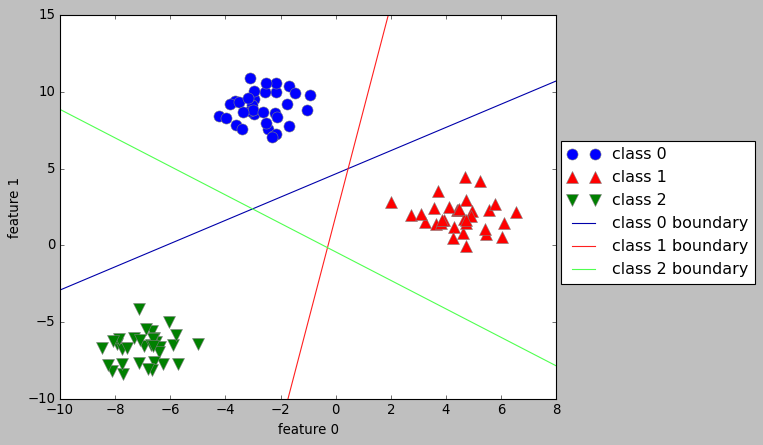

In [172]:
mglearn.discrete_scatter(X[:,0], X[:,1], y, c = ['b','r','g'])
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors) :
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0 ', 'class 1', 'class 2', 'class 0 boundary','class 1 boundary','class 2 boundary'],
           loc = (1.01,0.3))

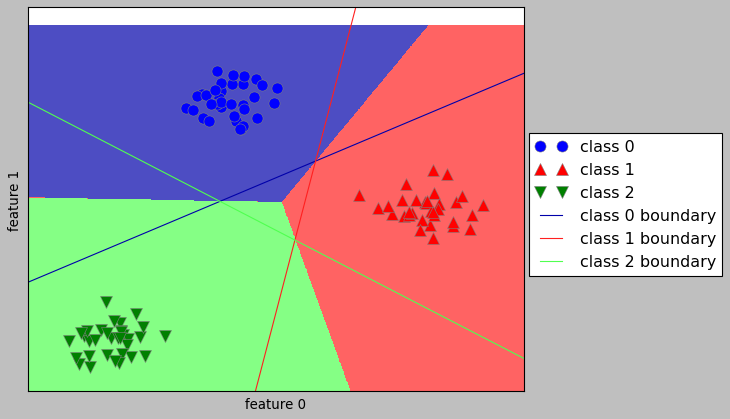

In [177]:
# 겹치는 부분은 가장 가까운 직선의 클래스가 된다.

mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = 0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y, c=['b','r','g'])
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors) :
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0 ', 'class 1', 'class 2', 'class 0 boundary','class 1 boundary','class 2 boundary'],
           loc = (1.01,0.3))

## SGDClassifier
#### 매개변수
- loss : hinge(default, svm), log(logistic regression)

## SGDRegressir
#### 매개변수
- loss : square_error(default, ridge)

#### 공통 매개변수
- penalty : l1,l2,elasticnet
- learning_rate : optimal(default, 반복함에 따라 지속적으로 감소), adaptive(eta0 매개변수를 추가로 필요, 조기조건에 달성할 때마다 5배씩 감소하고 1e-6 이 되면 학습 종료)

#### 유의 사항 : 경사하강법을 사용하므로 scale 이 동일하도록 전처리 해야함

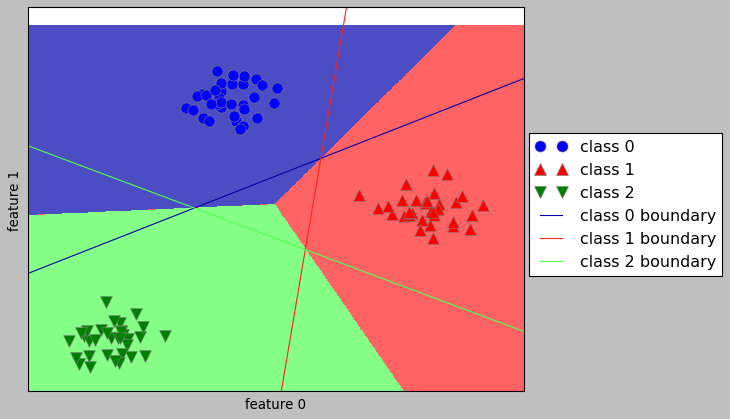

In [183]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha = 0.01, learning_rate='adaptive', eta0 = 0.1, random_state = 42, n_jobs=-1)
sgd_c.fit(X,y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill = True, alpha = 0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y, c = ['b','r','g'])
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors) :
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0 ', 'class 1', 'class 2', 'class 0 boundary','class 1 boundary','class 2 boundary'],
           loc = (1.01,0.3))

In [187]:
from sklearn.linear_model import SGDRegressor

X,y = mglearn.datasets.load_extended_boston()
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (506, 104)
y shape :  (506,)


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print(f"train score : {sgd_r.score(X_train, y_train):0.2f}")
print(f"test score : {sgd_r.score(X_test, y_test):0.2f}")


train score : 0.91
test score : 0.77
